# Basics of HDF5 files in Python

HDF5 (_Hierarchical Data Format_) is a file format for efficient use and storage of large array-like data sets. Even very large (multi-gigabyte) data can be handled in a way that allows the program to deal with only the necessary parts of the file without having to loading the entire file.

This is a quick guide on using the `H5PY` package in Python to handle HDF5 files. The full documentation of `H5PY` can be found at http://www.h5py.org/. A quickstart guide, which as very much the same information as this document, can be found at http://docs.h5py.org/en/latest/quick.html.

## A _very_ brief introduction to the HDF5 format

A HDF5 file is "hierarchical", because it consists of _groups_, which can contain other groups or _datasets_. For our purposes, a dataset is basically one array. 

The group/dataset hierarchy is organized by name very much like the file system of a Unix-like operating system. At the lowest level is the _root group_, called `/`. A dataset called `mydata` in the root group has the path `/mydata`. Other groups are like "subdirectories" of the root group: `/group1/mydata2`, `/group1/subgroup/moredata`, etc.

In [48]:
# Some plotting tools
%matplotlib inline
import seaborn
import matplotlib.pyplot as plt

import numpy as np
import h5py

## Creating an HDF5 file

Let's first create some data. Let's just make it a simple array of $x$ values in $0$ to $2\pi$ in the first column, $y = \sin x$ in the second column and $y = \cos x$ in the third column. We'll give it 100 rows.

In [33]:
data = np.zeros((100,3))
data[:,0] = np.linspace(0, 2*np.pi, 100)
data[:,1] = np.sin(data[:,0])
data[:,2] = np.cos(data[:,0])

A very good way is to use the file object as a context managed, with the `with` keyword. This way, the file is closed and all file I/O is managed automatically when the `with` block ends.

We'll also set some _attributes_. Attributes are metadata fields, which any group or dataset can contain. They are used like a regular dictionary.

In [58]:
with h5py.File("example.hdf5", "w") as outputfile:
    # Create the dataset
    dset = outputfile.create_dataset("sine_array", (100, 3), "f")
    
    # Set the values of the dataset
    dset[...] = data
    
    # Set attributes
    outputfile.attrs["title"] = "An example HDF5 file"
    dset.attrs["description"] = "An array with some values of x, sin(x) and cos(x)"
    dset.attrs["Npoints"] = 100
    
    # Create a group
    my_group = outputfile.create_group("example_group")

After the last line, a new dataset or group could be created inside `my_group` by writing `my_group.create_dataset(...)` etc.

## Reading an HDF5 file

At their simplest, HDF5 files can be used almost exactly like a regular Python dictionary. The following loops over all of the root level keys of a file and prints some properties. In this case our file has only one root-level key, because we created only one dataset in the file.

In [54]:
inputfile = h5py.File("example.hdf5", "r")

for key in inputfile:
    print(key)
    print(inputfile[key].name)

print(inputfile["sine_array"])

example_group
/example_group
sine_array
/sine_array
<HDF5 dataset "sine_array": shape (100, 3), type "<f4">


This shows how to read the dataset from the file we created and makes a plot of the data.

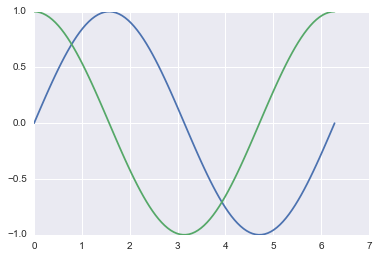

In [55]:
# Read the dataset as a NumPy array
data = np.array(inputfile["sine_array"])

# Make a plot
plt.plot(data[:,0], data[:,1])
plt.plot(data[:,0], data[:,2])

In [57]:
inputfile.close()